# Ejercicio de programación 1: Regresión lineal

## Introducción

En este ejercicio, implementará una regresión lineal y podrá ver cómo funciona en los datos. Antes de comenzar este ejercicio de programación, recomendamos ver las conferencias en video y completar las preguntas de revisión para los temas asociados.

Toda la información que necesita para resolver esta tarea se encuentra en este jupyter notebook, y todo el código que implementará tendrá lugar dentro de este jupyter notebook.

Antes de comenzar con los ejercicios, debemos importar todas las librerías necesarias para este ejercicio de programación. A lo largo del curso, utilizaremos [`numpy`](http://www.numpy.org/) para todas las matrices y operaciones de matriz y [`matplotlib`](https://matplotlib.org/) para graficar.

In [ ]:
# utilizado para manipular directorios
import os

# Computación científica y vectorial para python
import numpy as np

# Librería para graficar
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Se necesita para graficar superficies en 3D


# Le indica a matplotlib que inserte graficas en el jupyter notebook
%matplotlib inline

## Ejercicios

| Sección | Parte                                           
|---------| ----                                             
| 1       | [Ejercicio de calentamiento](#section1)                  
| 2       | [Calcular la función de costo para una variable](#section2)
| 3       | [Gradiente descendente para una variable](#section3) 
| 4       | [Normalización de características](#section4)             
| 5       | [Calcular la función de costo para varias variables](#section5)     
| 6       | [Gradiente descendente para múltiples variables](#section5) 
| 7       | [Ecuaciones normales](#section7)                        

## Debugging

Algunas cosas para tener en cuenta al realizar este ejercicio:

- Los índices de los arreglos en Python comienzan en cero, no en uno (Al contrario de OCTAVE/MATLAB). 

- Hay una distinción importante entre los arreglos de python (llamados `lista` o `tupla`) y las matrices de `numpy`. Debe usar matrices `numpy` en todos sus cálculos. Las operaciones de vector/matriz solo funcionan con matrices `numpy`. Las listas de Python no son compatibles con las operaciones de vector (solo se deben usar para ciclos).

- Si ve muchos errores en el tiempo de ejecución, revise sus operaciones matriciales para asegurarse de que está sumando y multiplicando matrices de dimensiones compatibles. Imprimir las dimensiones de las matrices `numpy` utilizando la propiedad` shape` le ayudará a corregir errores.

- Por defecto, `numpy` interpreta que los operadores matemáticos son operadores relacionales. Si desea hacer una multiplicación matricial, debe usar la función `dot` en` numpy`. Por ejemplo, si `A` y` B` son dos matrices `numpy`, entonces la operación de matriz AB es `np.dot (A, B)`. Tenga en cuenta que para matrices o vectores bidimensionales (unidimensionales), esto también es equivalente a `A @ B` (requiere python> = 3.5).

<a id="section1"></a>
## 1 Funciones simples de `numpy` y python

La primera parte de esta tarea te permite practicar con python y la sintaxis `numpy`. En la siguiente celda, encontrará el esquema de una función `python`. Modifícalo para devolver una matriz de identidad 5 x 5 completando el siguiente código:

```python
A = np.eye(5)
```
<a id="warmUpExercise"></a>

In [ ]:
def ejercicioCalentamiento():
    """
    Función de ejemplo en Python que calcula la matriz de identidad
    
    Devuelve
    -------
    A : array_like
        La matriz 5x5
    
    Instrucciones:
    ------------
    Devuelve la matriz identidad 5x5
    """    
    # ======== TU CODIGO AQUÍ ======
    A = np.eye(5)   # Modifica esta línea
    
    # ==============================
    return A

La celda anterior solo define la función `ejercicioCalentamiento`. Ahora podemos ejecutar la siguiente celda para ver su salida. Deberías ver algo similar a la siguiente matriz:

```python
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])
```

In [ ]:
ejercicioCalentamiento()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2 Regresión lineal univariable

Ahora implementarás una regresión lineal univariable para predecir las ganancias de un camión de comida. Supon que eres el CEO de una franquicia de restaurantes y estás considerando diferentes ciudades para abrir una nueva tienda. La cadena ya tiene camiones en varias ciudades y tienea datos de ganancias y poblaciones de las ciudades. Te gustaría utilizar estos datos para que te ayude a seleccionar a qué ciudad expandir tu franquicia.

El archivo `Data / ex1data1.txt` contiene el conjunto de datos para nuestro problema de regresión lineal. La primera columna es la población de una ciudad (en 10,000s) y la segunda columna es la ganancia de un camión de comida en esa ciudad (en 10,000s). Un valor negativo para la ganancia indica una pérdida.

Te proporcionamos el código necesario para cargar estos datos. El conjunto de datos se carga desde el archivo de datos en las variables `x` e ` y`:

In [ ]:
# Leer los datos separados por coma
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # Número de ejemplos de entrenamiento
m

97

### 2.1 Visualizar los datos

Antes de comenzar cualquier tarea, a menudo es útil comprender los datos visualizándolos. Para este conjunto de datos, puedes usar un diagrama de dispersión para visualizar los datos, ya que solo tiene dos propiedades para graficar (profit and population). Muchos otros problemas que encontrarás en la vida real son multidimensionales y no se pueden graficar en un diagrama en 2D. Hay muchas librerías para graficar en Python (consulte esta [publicación de blog] (https://blog.modeanalytics.com/python-data-visualization-libraries/) para obtener un resumen de las más populares).

En este curso, utilizaremos exclusivamente `matplotlib` para hacer todo nuestros gráficos. `matplotlib` es una de las librerías para graficar más populares en python y tiene amplias herramientas y funciones para hacer graficos hermosos. `pyplot` es un módulo dentro de` matplotlib` que proporciona una interfaz simplificada para las tareas de gráficos más comunes de `matplotlib`, imitando la interfaz para graficar de MATLAB.


En la siguiente parte, tu primer trabajo es completar la función `plotData` a continuación. Modifica la función y completa el siguiente código:

```python
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('Ganancia en $10,000')
    plt.xlabel('Población de la ciudad en 10,000s')
```

In [ ]:
def plotData(x, y):
    """
    Trazar los puntos de datos x e y en una nueva figura. Graficar los datos
     y da a la figura etiquetas de población y ganancia en sus respectivos ejes.
    
     Parámetros
     ----------
     x: array_like
         Valores de puntos de datos para el eje x.

     y: array_like
         Valores de puntos de datos para el eje y. Ten en cuenta que x e y deben tener el mismo tamaño.
    
     Instrucciones
     ------------
     Trace los datos de entrenamiento en una figura usando las funciones "figure" y "plot".
     Establezca las etiquetas de los ejes utilizando las funciones "xlabel" y "ylabel".
     Suponga que los datos de población y ganancia se han pasado como x
     e y argumentos de esta función.
    
     Pista
     ----
     Puede usar la opción 'ro' con plot para que aparezcan los puntos de los datos en como circulos rojos.
     Además, puedes hacer que los puntos sean más grandes al
     usar plot (..., 'ro', ms = 10), donde 'ms' se refiere al tamaño del punto. 
     También puedes establecer el color del punto utilizando la propiedad `mec`.
    """
    fig = plt.figure()  # Inicialice una nueva figura
    
    # ====================== TU CÓDIGO AQUÍ ======================= 
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('Ganancia en $10,000')
    plt.xlabel('Población de la ciudad en 10,000s')

    # =============================================================


Ahora ejecute la función definida con los datos cargados para visualizarlos. El resultado final debería parecerse a la siguiente figura:

![](Figures/dataset1.png)

Ejecute la siguiente celda para visualizar los datos.

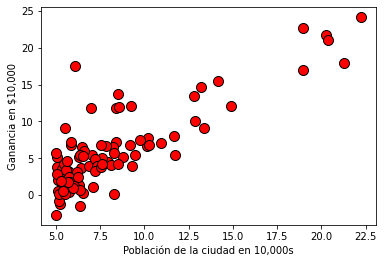

In [ ]:
plotData(X, y)

Para obtener más información sobre la función para gráficas `matplotlib` y los argumentos que se le pueden proporcionar, puedes escribir `? Plt.plot` en una celda dentro del jupyter notebook. Esto, abre una página separada que muestra la documentación para la función solicitada. También puedes buscar en línea documentación para graficar.

Para establecer los puntos en círculos rojos, utilizamos la opción `` o '' dentro de la función `plot`.

In [ ]:
?plt.plot

<a id="section2"></a>
### 2.2 Gradiente Descendente

En esta parte, ajustará los parámetros de regresión lineal $ \ theta $ a nuestro conjunto de datos utilizando el gradiente descendente.

#### 2.2.1 Actualizar las ecuaciones

El objetivo de la regresión lineal es minimizar la función de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

Donde la hipótesis $h_\theta(x)$ está dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recuerda que los parámetros del modelo son los valores $ \ theta_j $. Estos son los valores que ajustarán para minimizar el costo $ J (\ theta) $. Una forma de hacer esto es usando el algoritmo de gradiente descendente batch. El gradiente descendente batch, realiza la actualización en cada iteración

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualización simultánea } \theta_j \text{ para todos } j$$

En cada iteración del gradiente descendente, los parámetros $ \ theta_j $ se acercan a los valores óptimos que lograrán el costo más bajo J ($ \ theta $).

<div class="alert alert-block alert-warning">
** Nota de implementación: ** Almacenamos cada ejemplo como una fila en la matriz $ X $ en `numpy`. Para tener en cuenta el término de intercepción ($ \ theta_0 $), agregamos una primera columna adicional a $ X $ y la configuramos con unos. Esto nos permite tratar $ \ theta_0 $ como otra 'característica'.
</div>


#### 2.2.2 Implementación

Ya hemos configurado los datos para la regresión lineal. En la siguiente celda, agregamos otra dimensión a nuestros datos para acomodar el término de intercepción $ \ theta_0 $. **NO ejecute esta celda más de una vez.**

In [ ]:
# Agregue una columna de unos a X. El 'stack' de funciones numpy une matrices a lo largo de un eje dado.
# El primer eje (axis = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (axis = 1) se refieren a columnas (características).
X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 2.2.3 Calculando la función de costo $J(\theta)$

A medida que realizas el gradiente descendente para minimizar la función de costo $ J (\ theta) $, es útil monitorear la convergencia calculando el costo. En esta sección, implementarás una función para calcular $ J (\ theta) $ y así poder verificar la convergencia de la implementación de gradiente descendente.

Tu próxima tarea es completar el código para la función `calcularCosto` que calcula $ J (\ theta) $. Mientras lo haces, recuerda que las variables $ X $ y $ y $ no son escalares. $ X $ es una matriz cuyas filas representan los ejemplos de entrenamiento y $ y $ es un vector en el que cada elemento representa el valor en una fila dada de $ X $.
<a id="computeCost"></a>

In [ ]:
def calcularCosto(X, y, theta):
    """
    Calcular el costo de la regresión lineal. Calcula el costo de usar theta como
     parámetro de la regresión lineal para ajustar los puntos de datos en X e y.
    
     Parámetros
     ----------
     X: array_like
         El conjunto de datos de entrada de forma (m x n + 1), donde m es el número de ejemplos,
         y n es el número de características. Asumimos un vector de unos ya
         agregado a las características, por lo que tenemos n + 1 columnas.
    
     y: array_like
         Los valores de la función en cada punto de datos. Este es un vector de
         forma (m,).
    
     theta: array_like
         Los parámetros para la función de regresión. Este es un vector de
         forma (n + 1,).
    
     Devuelve
     -------
     J: float
         El valor de la función de costo.
    
     Instrucciones
     ------------
     Calcule el costo de una elección particular de theta.
     Deberías poner a J al costo.
    """
    
    # inicializa valores útiles
    m = y.size  # número de ejemplos de entrenamiento
    
    # Debes devolver las siguientes variables correctamente
    J = 0
    
    # ====================== TU CÓDIGO AQUÍ =====================
    error=0
    for i in range(0,len(X)):
      error+=((theta[0]+(theta[1]*X[i]))-y[i])**2
    J=error/(2*len(X))
    
    # ===========================================================
    return J

Una vez que haya completado la función, el siguiente paso ejecutará `calcularCosto` dos veces usando dos inicializaciones diferentes de $ \ theta $. Verás el costo impreso en la pantalla.

In [ ]:
J = calcularCosto(X, y, theta=np.array([0.0, 0.0]))

print('Con theta = [0, 0] \nCosto calculado = %.2f' % J[1])
print('valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costo
J = calcularCosto(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\nCosto calculado = %.2f' % J[1])
print('valor de costo esperado (aproximadamente) 54.24')

Con theta = [0, 0] 
Costo calculado = 32.07
valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
Costo calculado = 54.24
valor de costo esperado (aproximadamente) 54.24


<a id="section3"></a>
#### 2.2.4 Gradiente descendente

A continuación, completarás una función que implementa el Gradiente descendente.
La estructura de ciclo ya está escrita y solo necesitas proporcionar las actualizaciones a $ \ theta $ dentro de cada iteración.

Mientras lo haces, asegurate de comprender lo que estás tratando de optimizar y lo que se está actualizando. Ten en cuenta que el costo $ J (\ theta) $ está parametrizado por el vector $ \ theta $, no $ X $ y $ y $. Es decir, minimizamos el valor de $ J (\ theta) $ cambiando los valores del vector $ \ theta $, no cambiando $ X $ o $ y $. [Consulte las ecuaciones en este jupyter notebook] (# sección2) y las video conferencias. Una buena manera de verificar que el Gradiente descendente funciona correctamente es mirar el valor de $ J (\ theta) $ y comprobar que disminuye con cada iteración.

El código de inicio para la función `gradientDescent` llama a` calcularCosto` en cada iteración y guarda el costo en una lista de `python`. Suponiendo que haya implementado el Gradiente descendente y `calcularCosto` correctamente, su valor de $ J (\ theta) $ nunca debería aumentar, y debería converger a un valor estable al final del algoritmo.

<div class = "alert alert-box alert-warning">
** Vectores y matrices en `numpy` ** - Notas importantes de implementación

Un vector en `numpy` es una matriz unidimensional, por ejemplo` np.array ([1, 2, 3]) `es un vector. Una matriz en `numpy` es una matriz bidimensional, por ejemplo` np.array ([[1, 2, 3], [4, 5, 6]]) `. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

Dado lo anterior, la función `np.dot` que usaremos para todas las multiplicaciones de matrices / vectores tiene las siguientes propiedades:
- Siempre realiza productos internos en vectores. Si `x = np.array ([1, 2, 3])`, entonces `np.dot (x, x)` es un escalar.
- Para la multiplicación matriz-vector, entonces si $ X $ es una matriz $ m \ veces n $ y $ y $ es un vector de longitud $ m $, entonces la operación `np.dot (y, X)` considera $ y $ como $ 1 \ veces  m $ vector. Por otro lado, si $ y $ es un vector de longitud $ n $, entonces la operación `np.dot (X, y)` considera $ y $ como un vector $ n \ veces 1 $.
- Un vector puede ser promovido a una matriz usando `y [None]` o `[y [np.newaxis]`. Es decir, si `y = np.array ([1, 2, 3])` es un vector de tamaño 3, entonces `y [None,:]` es una matriz de forma $ 1 \ veces 3 $. Podemos usar `y [:, None]` para obtener una forma de $ 3 \ veces 1 $.
<div>
<a id="gradientDescent"> </a>

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Realiza gradiente descendente para aprender `theta`. Actualiza theta tomando `num_iters`
    pasos de gradiente con tasa de aprendizaje `alfa`.
    
    Parámetros
    ----------
    X: array_like
        El conjunto de datos de entrada de forma (m x n + 1).
    
    y: array_like
        Valor en las características dadas. Un vector de forma (m,).
    
    theta: array_like
        Valores iniciales para los parámetros de regresión lineal.
        Un vector de forma (n + 1,).
    
    alfa: float
        La tasa de aprendizaje.
    
    num_iters: int
        El número de iteraciones para el gradiente descendente.
    
    Devuelve
    -------
    theta: array_like
        Los parámetros de regresión lineal aprendidos. Un vector de forma (n + 1,).
    
    J_history: lista
        Una lista de Python para los valores de la función de costo después de cada iteración.
    
    Instrucciones
    ------------
    Realiza un solo paso de gradiente en el vector de parámetros theta.

    Durante la depuración, puede ser útil imprimir los valores de
    la función de costo (calcularCosto) y el gradiente aquí.
    """
    # inicializa valores útiles
    m = y.shape[0]  # número de ejemplos de entrenamiento
    
    # hacer una copia de theta, para evitar cambiar la matriz original, ya que las matrices numpy
    # se pasan por referencia a funciones
    theta = theta.copy()
    J_history = [] # Use una lista de Python para guardar el costo en cada iteración
    xTrans = X.transpose()
    for i in range(num_iters):
        # ==================== TU CÓDIGO AQUÍ ================================= 
        m=len(X)
        h=np.dot(X, theta)
        loss = h - y
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
        # temp[0]=theta[0]-(alpha/m)*(np.sum(loss))
        # temp[1]=theta[1]-(alpha/m)*(np.sum((loss)*X[:,1]))
        # theta=temp

        # =====================================================================
        
        # guarde el costo de J en cada iteración
        J_history.append(calcularCosto(X, y, theta))
    return theta, J_history

Una vez que hayas terminado, llama a la función implementada `gradientDescent` e imprimw el $ \ theta $ calculado. Inicializamos los parámetros $ \ theta $ a 0 y la tasa de aprendizaje $ \ alpha $ a 0.01. Ejecuta la siguiente celda para verificar tu código.

In [ ]:
# inicializar parámetros de ajuste
theta = np.zeros (2)

# algunas configuraciones de gradiente descendente
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)

print ('Theta encontrado por gradiente descendente: {: .4f}, {: .4f}'. format (* theta))
print ('Valores esperados de theta (aproximadamente): [-3.6303, 1.1664]')

Theta encontrado por gradiente descendente: -3.6303,  1.1664
Valores esperados de theta (aproximadamente): [-3.6303, 1.1664]


Usaremos los parámetros finales para trazar el ajuste lineal. Los resultados deberían parecerse a la siguiente figura.

![](Figures/regression_result.png)

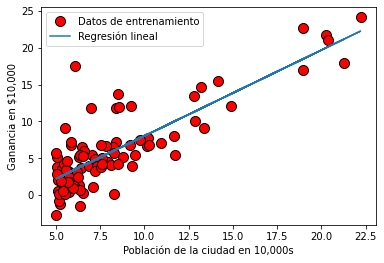

In [ ]:
# grafica el ajuste lineal
plotData(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Datos de entrenamiento', 'Regresión lineal']);

Los valores finales para $ \ theta $ también se usarán para hacer predicciones sobre la ganancia en áreas de 35,000 y 70,000 personas.

<div class = "alert alert-block alert-success">
Observa la forma en que las siguientes líneas usan la multiplicación de matrices, en lugar de la suma explícita o el bucle, para calcular las predicciones. Este es un ejemplo de vectorización de código en `numpy`.
</div>

<div class = "alert alert-block alert-success">
Ten en cuenta que el primer argumento de la función `numpy`` dot` es una lista de python. `numpy` puede convertir internamente listas de Python **válidas** en matrices numpy cuando se proporcionan explícitamente como argumentos para funciones` numpy`.
</div>


In [ ]:
# Predecir valores para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 3.5], theta)
print('Para población = 35,000, predecimos una ganancia de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('Para población = 70,000, predecimos una ganancia de {:.2f}\n'.format(predict2*10000))

Para población = 35,000, predecimos una ganancia de 4519.77

Para población = 70,000, predecimos una ganancia de 45342.45



### 2.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$ grafica el costo en una cuadrícula bidimensional de valores $\theta_0$ y $\theta_1$. No necesitarás codificar nada nuevo para esta parte, pero debes comprender cómo el código que has escrito ya está creando estas imágenes.

En la siguiente celda, el código se configura para calcular $J(\theta)$ sobre una cuadrícula de valores utilizando la función `computeCost` que usted escribió previamente. Después de ejecutar la siguiente celda, tendrá una matriz bidimensional de valores $J(\theta)$. Luego, esos valores se usan para producir gráficos de superficie y contorno de $J(\theta)$ usando las funciones de matplotlib `plot_surface` y `contourf`. Las gráficas deberían tener un aspecto similar al siguiente:

![](Figures/cost_function.png)

El propósito de estos gráficos es mostrarle cómo $J(\theta)$ varía con los cambios en $\theta_0$ y $\theta_1$. La función de costo $J(\theta)$ tiene forma de cuenco y tiene un mínimo global. (Esto es más fácil de ver en el diagrama de contorno que en el diagrama de superficie 3D). Este mínimo es el punto óptimo para $\theta_0$ y $\theta_1$, y con cada paso el gradiente descente se acerca a este punto.

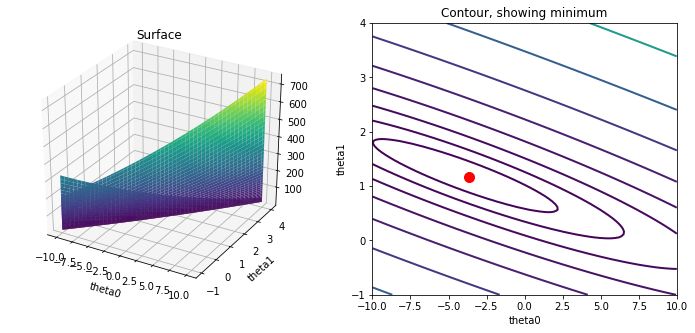

In [ ]:
# Cuadricula sobre la que se va a calcular J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializar J_vals en una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Se llena J_vals con los valores de la función de costo
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = calcularCosto(X, y, [theta0, theta1])[1]
        
# Debido a la forma en que funcionan las mallas en el comando de navegación, necesitamos
# transponer J_vals antes de llamar a surf, o de lo contrario los ejes se voltearán
J_vals = J_vals.T

# Gráfica de superficie
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# Gráfica de contorno
# Grafica J_vals como 15 contornos espaciados logarítmicamente entre 0.01 y 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')

plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass

## 3 Regresión lineal multivariable

En esta parte, implementará una regresión lineal multivariable para predecir los precios de las casas. Supon que estás vendiendo tu casa y quieres saber cuál sería un buen precio de mercado. Una forma de hacerlo es recopilar primero información sobre las casas vendidas recientemente y hacer un modelo de precios de la vivienda.

El archivo `Data / ex1data2.txt` contiene un conjunto de capacitación sobre precios de la vivienda en Portland, Oregon. La primera columna es el tamaño de la casa (en pies cuadrados), la segunda columna es el número de habitaciones y la tercera columna es el precio de la casa.

<a id="section4"></a>
### 3.1 Normalización de las carcaterísticas

Comenzamos cargando y mostrando algunos valores de este conjunto de datos. Al observar los valores, ten en cuenta que el tamaño de las casas es aproximadamente 1000 veces el número de dormitorios. Cuando las características difieren en orden de magnitud, el primer escalado de características puede hacer que el gradiente descendente converja mucho más rápidamente.

In [ ]:
# Cargar los datos
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# Imprimir algunos puntos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


Tu tarea aquí es completar el código en la función `featureNormalize`:
- Resta el valor medio de cada característica del conjunto de datos.
- Después de restar la media, adicionalmente escala (divide) los valores de las características por sus respectivas "desviaciones estándar".

La desviación estándar es una forma de medir cuánta variación hay en el rango de valores de una característica particular (la mayoría de los puntos de datos estarán dentro de ± 2 desviaciones estándar de la media); Esta es una alternativa al tomar el rango de valores (max-min). En `numpy`, puedes usar la función` std` para calcular la desviación estándar.

Por ejemplo, la cantidad `X [:, 0]` contiene todos los valores de $ x_1 $ (tamaños de casas) en el conjunto de entrenamiento, por lo que `np.std (X [:, 0])` calcula la desviación estándar de tamaños de casas
En el momento en que se llama a la función `featureNormalize`, la columna adicional de unos correspondiente a $ x_0 = 1 $ aún no se ha agregado a $ X $.

Haz esto para todas las características y tu código debería funcionar con conjuntos de datos de todos los tamaños (cualquier número de características / ejemplos). Tenga en cuenta que cada columna de la matriz $ X $ corresponde a una característica.

<div class = "alert alert-block alert-warning">
** Nota de implementación: ** Al normalizar las funciones, es importante
guardar los valores utilizados para la normalización: el valor medio y la desviación estándar utilizada para los cálculos. Después de aprender los parámetros. del modelo, a menudo queremos predecir los precios de las casas que no hemos visto antes. Dado un nuevo valor de x (área de sala de estar y número de dormitorios), primero debemos normalizar x usando la media y la desviación estándar que habíamos calculado previamente del conjunto de entrenamiento.
</div>
<a id="featureNormalize"> </a>

In [ ]:
def  featureNormalize(X):
    """
    Normaliza las características en X. devuelve una versión normalizada de X donde
    el valor medio de cada característica es 0 y la desviación estándar
    es 1. Este suele ser un buen paso de preprocesamiento cuando se trabaja con
    algoritmos de aprendizaje
    
    Parámetros
    ----------
    X: array_like
        El conjunto de datos de forma (m x n).
    
    Devuelve
    -------
    X_norm: array_like
        El conjunto de datos normalizado de forma (m x n).
    
    Instrucciones
    ------------
    Primero, para cada característica, calcula la media de la característica
    y restalo del conjunto de datos, almacenando el valor medio en mu.
    Luego, calcula la desviación estándar de cada característica y divide
    cada característica por su desviación estándar, almacenando la desviación estándar
    en sigma
    
    Ten en cuenta que X es una matriz donde cada columna es una característica y cada fila es
    un ejemplo. Debes realizar la normalización por separado para cada característica.
    
    Pista
    ----
    Puedes encontrar útiles las funciones 'np.mean' y 'np.std'.
    """
    # Necesitas establecer estos valores correctamente
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    # =========================== TU CÓDIGO AQUÍ =====================
    # for i in range(0,len(X)):
      # print(X[:,i])
      # mu+=np.mean(X[:,i])
      # X_norm+=np.mean(X[:,i])    
      # sigma+=np.std(X[:,i])
      # X_norm/=np.std(X[:,i])  
    
    X_norm[:,0] = (X[:,0] - np.mean(X[:,0])) / np.std(X[:,0])
    X_norm[:,1] = (X[:,1] - np.mean(X[:,1])) / np.std(X[:,1])

    mu_0=(X[:,0] - np.mean(X[:,0]))
    mu[0]=np.sum(mu_0, dtype = np.float32)
    mu_1=(X[:,1] - np.mean(X[:,1]))
    mu[1]=np.sum(mu_1, dtype = np.float32)


    sigma_0=(X[:,0]/np.std(X[:,0]))
    sigma[0]=np.sum(sigma_0, dtype = np.float32)
    sigma_1=(X[:,1]/np.std(X[:,1]))
    sigma[1]=np.sum(sigma_1, dtype = np.float32)
    
    # ================================================================
    return X_norm, mu, sigma

Ejecuta la siguiente celda para ejecutar la función implementada `featureNormalize`.

In [ ]:
# Llama featureNormalize en los datos cargados
X_norm, mu, sigma = featureNormalize(X)
# print(X_norm)
print('Media calculada:', mu)
print('Desviación estándar calculada:', sigma)

Media calculada: [-6.10351562e-04  9.38773155e-07]
Desviación estándar calculada: [119.60275269 197.91647339]


Después de probar la función `featureNormalize`, agregamos el término de intercepción a ` X_norm`:

In [ ]:
# Agregar término de intercepción a X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

<a id="section5"></a>
### 3.2 Gradiente descendente


Anteriormente, implementó el gradiente descendente en un problema de regresión univariante. La única diferencia ahora es que hay una característica más en la matriz $ X $. La función de hipótesis y la actualización del gradiente descendente de lote la regla permanece sin cambios.

Debe completar el código para las funciones `computeCostMulti` y `gradientDescentMulti` para implementar la función de costo y el gradiente descendente para la regresión lineal con múltiples variables. Si su código en la parte anterior (variable única) ya admite múltiples variables, también puede usarlo aquí. Asegúrese de que su código sea compatible con cualquier número de características y esté bien vectorizado.
Puede usar la propiedad `shape` de las matrices `numpy` para averiguar cuántas características están presentes en el conjunto de datos.

<div class="alert alert-block alert-warning">
**Nota para la implementación:** En el caso multivariante, la función de costo puede escribirse en la siguiente forma vectorizada:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

Donde: 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix} $$

La versión vectorizada es eficiente cuando trabajas con herramientas de computación numérica como `numpy`. Si es un experto en operaciones matriciales, puede probarse a sí mismo que las dos formas son equivalentes.

</div>

<a id="computeCostMulti"></a>

In [ ]:
def computeCostMulti(X, y, theta):
    """
    Calcule el costo de la regresión lineal con múltiples variables.
    Calcula el costo de usar theta como parámetro de regresión lineal para ajustar los puntos de datos en X e y.

    Parametros
    ----------
    X : array_like
        El data set de dimensiones (m x n+1).
    
    y : array_like
        Un vector de dimension (m, ) para los valores en un punto de datos dado.
    
    theta : array_like
        Los parametros de la regresión lineal. un vector de dimesiones (n+1, )
    
    Retorna/Devuelve
    -------
    J : float
        El valor de la función de costo. 
    
    Instrucciones
    ------------
    Calcule el costo de una elección particular de theta. Debería dar a J el valor del costo.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    error=0
    # ======================= YOUR CODE HERE ===========================
    # for i in range(0,len(X)):
    #   t=((X[i]*theta[1])-y[i]).transpose()
    #   print((X[i]*theta[1])-y[i])
    #   error+=t*((X[i]*theta[1])-y[i])
    t=((X.dot(theta)-y)).transpose()
    error=t@((np.dot(X,theta)-y))
    # print(np.dot(X,theta))
    J=error/(2*m)
    # J = (t)@(X.dot(theta) - y)/(2 * m)
    # hypothesis = np.dot(X, theta)
    # loss = hypothesis - y
    # J = np.sum(loss ** 2) / (2 * m)
    # ==================================================================
    return J


In [ ]:
J = computeCostMulti(X, y, theta=np.array([-1, 2, 2]))
print(J)

65591567579.9464


<a id="gradientDescentMulti"></a>

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Realiza el gradiente descendente para aprender theta.
    Actualiza theta tomando pasos de num_iters con tasa de aprendizaje alfa.
        
    Parámetros
    ----------
    X : array_like
        El dataset de dimensiones (m x n+1).
    
    y : array_like
        un vector de dimensiones (m, ) para los valores en un punto de datos dado.
    
    theta : array_like
        Los parámetros de la regresión lineal. Un vector de dimensión (n+1, )
    
    alpha : float
        La tasa de aprendizaje del gradiente descendente. 
    
    num_iters : int
        Número de iteraciones al ejecutar el gradiente descendente. 
    
    Retorna
    -------
    theta : array_like
        Los parámetros de regresión lineal aprendidos. Un vector de dimensiones (n+1, ).
    
    J_history : list
        Una lista de Python para los valores de la función de costo después de cada iteración.
    
    Instrucciones
    ------------
    Realice un solo paso del gradiente descendente en el vector de parámetros theta.

    Durante la depuración, puede ser útil imprimir los valores de
    la función de costo (computeCost) y el gradiente aquí.
    """
    # Inicialice algunos valores útiles
    m = y.shape[0] # numero de de muestras de entrenamiento de ejemplo
    
    # Haga una copia de theta, que se actualizará por el gradiente descendente
    theta = theta.copy()
    
    J_history = []
    xTrans = X.transpose()
    for i in range(num_iters):
        # ======================= TU CÓDIGO AQUÍ ==========================
      h=np.dot(X, theta)
      loss = h - y
      gradient = np.dot(xTrans, loss) / m
      theta = theta - alpha * gradient
        
        # =================================================================
        
        # Guarde la función de costo J en cada iteración
      J_history.append(computeCostMulti(X, y, theta))
        
    
    return theta, J_history

In [ ]:
theta = np.zeros (3)

# algunas configuraciones de gradiente descendente
iterations = 50
alpha = 0.01

theta, J_history = gradientDescentMulti(X ,y, theta, alpha, iterations)
print(J_history)


[64297776251.62009, 63031018305.52133, 61790694237.532486, 60576236901.99104, 59387091739.988594, 58222716488.38939, 57082580895.8954, 55966166445.97887, 54872966086.50778, 53802483965.89506, 52754235175.605446, 51727745498.85994, 50722551165.380974, 49738198612.02587, 48774244249.16026, 47830254232.62681, 46905804241.168976, 46000479259.17251, 45113873364.59137, 44245589521.92843, 43395239380.14428, 42562443075.37121, 41746829038.31239, 40948033806.209465, 40165701839.264984, 39399485341.4087, 38649044085.30025, 37914045241.46272, 37194163211.4454, 36489079464.915146, 35798482380.58049, 35122067090.852936, 34459535330.15381, 33810595286.776836, 33174961458.21924, 32552354509.895866, 31942501137.15358, 31345133930.505226, 30759991244.00422, 30186817066.683086, 29625360896.98129, 29075377620.08948, 28536627388.139034, 28008875503.167995, 27491892302.795826, 26985453048.541317, 26489337816.719707, 26003331391.856533, 25527223162.557613, 25060807019.775593]


#### 3.2.1 Selecting learning rates

En esta parte del ejercicio, podrá probar diferentes tasas de aprendizaje para el conjunto de datos y encontrar una tasa de aprendizaje que converja rápidamente. Puede cambiar la tasa de aprendizaje modificando el siguiente código, cambiando la parte del código que establece la tasa de aprendizaje.

Utilice su implementación de la función `gradientDescentMulti` y ejecute el gradiente descendente durante aproximadamente 50 iteraciones a la velocidad de aprendizaje elegida. La función también debe devolver el historial de los valores $ J (\ theta) $ en un vector $ J $.

Después de la última iteración, trace los valores de J contra el número de iteraciones.

Si eligió una tasa de aprendizaje dentro de un buen rango, su trama se verá similar a la siguiente Figura.

![](Figures/learning_rate.png)

Si su gráfico se ve muy diferente, especialmente si su valor de $J(\theta)$ aumenta o incluso "explota", ajuste su tasa de aprendizaje e intente nuevamente. Recomendamos probar valores de la tasa de aprendizaje $\alpha$ en una escala logarítmica, en pasos multiplicativos de aproximadamente 3 veces el valor anterior (es decir, 0.3, 0.1, 0.03, 0.01 y así sucesivamente). También es posible que desee ajustar el número de iteraciones que está ejecutando, este le ayudará a ver la tendencia general en la curva.

<div class="alert alert-block alert-warning">
**Nota para la implementación:** 
Si su tasa de aprendizaje es demasiado grande, $J(\theta)$ puede divergir y "explotar", lo que da como resultado valores que son demasiado grandes para los cálculos en la computadora. En estas situaciones,`numpy` tenderá a devolver
NaNs. NaN significa "no un número" y a menudo es causado por operaciones indefinidas que involucran −∞ and +∞.
</div>

<div class="alert alert-block alert-warning">
**Tip para MATPLOTLIB:** Para comparar cómo las diferentes tasas de aprendizaje afectan la convergencia, es útil graficar  $J$ para varias tasas de aprendizaje en la misma figura. Esto se puede hacer convirtiendo a `alpha` en una lista de python, recorriendo los valores dentro de esta lista y llamando a la función plot en cada iteración del loop. También es útil tener una leyenda para distinguir las diferentes líneas dentro de la trama. Busque en línea `pyplot.legend` para obtener ayuda sobre cómo mostrar leyendas en` matplotlib`.
</div>

Observe los cambios en las curvas de convergencia a medida que cambia la tasa de aprendizaje. Con una tasa de aprendizaje pequeña, debería encontrar que el gradiente descendente tarda mucho en converger al valor óptimo. Por el contrario, con una gran tasa de aprendizaje, ¡el gradiente descendente podría no converger o incluso divergir!
Usando la mejor tasa de aprendizaje que encontraste, ejecuta el script
para el gradiente descendente hasta la convergencia para encontrar los valores finales de $\theta$. Luego, use este valor de $\theta$ para predecir el precio de una casa con 1650 pies cuadrados y
3 dormitorios. Utilizará el valor más adelante para verificar su implementación de las ecuaciones normales. ¡No olvide normalizar sus funciones cuando haga esta predicción!

theta computed from gradient descent: [340412.65957447 109447.79558639  -6578.3539709 ]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $0


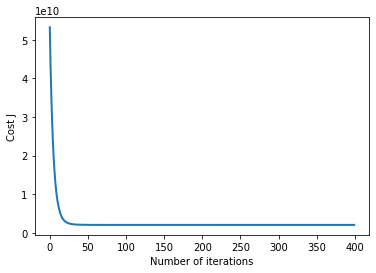

In [ ]:
"""
Instrucciones
------------
Le proporcionamos el siguiente código de inicio, que ejecuta
el gradiente descendente con una tasa de aprendizaje particular (alfa).

Su primera tarea es asegurarse de que sus funciones - `computeCost`
y "gradientDescent" ya funcionan con este código de inicio y
Soportan múltiples variables.

Después de eso, intente ejecutar el gradiente descendente con diferentes valores de
alfa y ver cuál le da el mejor resultado.

Finalmente, debe completar el código al final para predecir el precio
de una casa de 1650 pies cuadrados y 3 dormitorios.

Pista
----
En la predicción, asegúrese de hacer la misma función de normalización.
"""
#Escoja algún valor de alfa - cambie esto
alpha = 0.1
num_iters = 400

# inicialice teta y corra el gradiente descendente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Cree el gráfico de convergencia
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Muestre el resultado del gradiente descendente
print('Teta calculado a partir del gradiente descendente: {:s}'.format(str(theta)))

# Estime el precio de una casa de 1650 pies cuadrados y 3 habitaciones
# ======================= SU CÓDIGO AQUÍ ===========================

# Recuerde que la primera columna de X es toda-unos.
# Por lo tanto, no necesita ser normalizada.

price = 0   # Deberías cambiar esto

# ===================================================================

print('Precio pronosticado de una casa de 1650 pies cuadrados y 3 habitaciones (Usando el gradiente descendente): ${:.0f}'.format(price))

<a id="section7"></a>
### 3.3 Ecuaciones normales
aprendiste que la solución de forma más cercana para la regresión lineal es

$$ \ theta = \ left (X ^ T X \ right) ^ {- 1} X ^ T \ vec {y} $$

El uso de esta fórmula no requiere ningun escalamineto de características, y se obtiene una solución exacta en un cálculo: no hay "cliclo hasta la convergencia" como en el gradiente descendente.

Primero, cargamos nuevamente los datos para asegurarnos de que las variables no se hayan modificado. Recuerda que si bien no necesita escalar las características, aún debemos agregar una columna de unos a la matriz $ X $ para tener un término de intercepción ($ \ theta_0 $). El código en la siguiente celda agregará la columna de unos a X.

In [ ]:
# Cargamos los datos
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Completa el código para la función `normalEqn` a continuación, para usar la fórmula anterior para calcular $ \ theta $.

<a id="normalEqn"></a>

In [ ]:
def normalEqn(X, y):
    """
    Calcula la solución de la forma más cercana para la regresión lineal utilizando las ecuaciones normales.
    
     Parámetros
     ----------
     X: array_like
         El conjunto de datos de forma (m x n + 1).
    
     y: array_like
         El valor en cada punto de datos. Un vector de forma (m,).
    
     Devuelve
     -------
     theta: array_like
         Parámetros de regresión lineal estimados. Un vector de forma (n + 1,).
    
     Instrucciones
     ------------
     Completa el código para calcular la solución de la forma más cercana a la regresión lineal y poner el resultado en theta.
    
     Pista
     ----
     Busqca la función `np.linalg.pinv` para calcular la matriz inversa.
    """
    theta = np.zeros(X.shape[1])
    XT = X.T
    # ===================== TU CÓDIGO AQUÍ ============================
    theta=np.linalg.inv(XT @ X) @ XT @ y.T
    
    # =================================================================
    return theta

Ahora, una vez que haya encontrado $ \ theta $ usando estE
método, usalo para hacer una predicción de precios para una casa de 1650 pies cuadrados con
3 dormitorios. Deberías encontrar que da el mismo precio previsto que el valor
que obtuviste usando el ajuste del modelo con gradiente descendente.

In [ ]:
# Calcular los parámetros a partir de la ecuación normal.
theta = normalEqn(X, y);

# Mostrar el resultado de la ecuación normal
print('Theta calculado a partir de las ecuaciones normales: {:s}'.format(str(theta)));

# Estime el precio de una casa de 1650 pies cuadrados y 3 habitaciones
# ====================== TU CÓDIGO AQUÍ ======================
X_1650 = [1650, 3]
X_new = np.append(1, X_1650)
pred=np.dot(X_new,theta)
price = pred # Debes cambiar esto

# ============================================================

print('Precio previsto de una casa de 1650 pies cuadrados y 3 habitaciones (usando ecuaciones normales): ${:.0f}'.format(price))

Theta calculado a partir de las ecuaciones normales: [89597.9095428    139.21067402 -8738.01911233]
Precio previsto de una casa de 1650 pies cuadrados y 3 habitaciones (usando ecuaciones normales): $293081


**Importar regresión lineal, fit y predict el precio de la casa con 1650 pies cuadrados con la librería sklearn**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X, y)

In [ ]:
reg.score(X, y)

0.7329450180289142

In [ ]:
X_1650 = np.array([[1, 1650, 3]])
reg.predict(X_1650)

array([293081.4643349])